This notebook explores rate of coverage for any given term, focusing on word counts, collocations, tf-idf and logit models

In [1]:
import pandas as pd
import altair as alt
import glob, os
import numpy as np
import re
from nltk.tokenize import word_tokenize
from itertools import combinations
from collections import Counter
import warnings
warnings.filterwarnings('ignore')
# alt.renderers.enable('html') 

alt.renderers.enable('default')
alt.data_transformers.enable('default', max_rows=None)

DataTransformerRegistry.enable('default')

In [2]:
import calculate_coverage

In [3]:
# Full Corpus
%store -r df

In [6]:
df.volume_number = df.volume_number.fillna(0.0)

In [7]:
df.volume_number.unique()

array([ 0.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [8]:
df.volume_number = df.volume_number.astype(int)
# df.volume_number = df.volume_number.astype(str)

In [9]:
df.issue_number.unique()

array(['no. 1', 'no. 2', 'no. 3', 'no. 4', 'no. 5', 'no. 6', 'no. 7-8',
       'no. 9-10', 'no. 11-12', 'no. 13-14', 'no. 15', 'no. 16', 'no. 17',
       'no. 18', 'no. 19-20', 'no. 21-22', 'no. 28', 'no. 29-30', '6-May',
       '8-Jul', '10-Sep', '12-Nov', '2-Jan', '4-Mar', '8-May', '12-Sep',
       '4-Jan', '12-Jan', 1, 2, '6-Jan', 'Vol. 1 no. 1', 'Vol. 2 no. 1',
       'Vol. 2 no. 2', 'Vol. 2 no. 3', 'Vol. 2 no. 4', 'Vol. 3 no. 1',
       'Vol. 3 no. 2', 'Vol. 3 no. 3', 'Vol. 3 no. 4', 'Vol. 4 no. 1',
       'Vol. 4 no. 2', 'Vol. 4 no. 3', 'Vol. 4 no. 4', 'Vol. 5 no. 1',
       'Vol. 12 no. 3', 'Vol. XI no. 1', 'Vol. XI no. 2', 'Vol. XI no. 3',
       'Vol. XI no. 4', 'Vol. 12 no. 1', 'Vol. 12 no. 5', 'Vol. 12 no. 6',
       15.0, 19.0, 20.0, 21.0, 78.0, 79.0, 54.0, 55.0, 58.0, 59.0, 60.0,
       80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0,
       91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0,
       102.0, 103.0, 104.0, 105.0, 106.0, 107.0,

In [29]:
df.volume_number.unique()

array(['nan', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0', '10.0'],
      dtype=object)

In [25]:
df[df.volume_number.notna()]

sequence section    token  pos  count cleaned_magazine_title  \
0           1.0     NaN      nan  NaN    0.0   afro-asian_bulletin_   
1           6.0    body        J  UNK    1.0   afro-asian_bulletin_   
2           7.0    body        !    .    1.0   afro-asian_bulletin_   
3           7.0    body        &   CC    1.0   afro-asian_bulletin_   
4           7.0    body        '  POS    1.0   afro-asian_bulletin_   
...         ...     ...      ...  ...    ...                    ...   
13396      86.0    body  Printed  UNK    1.0   afro-asian_bulletin_   
13397      86.0    body   Sarwat  UNK    1.0   afro-asian_bulletin_   
13398      86.0    body       St  UNK    1.0   afro-asian_bulletin_   
13399      86.0    body      Tel  UNK    1.0   afro-asian_bulletin_   
13400      86.0    body       by  UNK    1.0   afro-asian_bulletin_   

                          ht_generated_title                htid  \
0       afro-asian_bulletin_v.3_no.5-12_1961  mdp.39015061285097   
1       afro-asian_bulletin_v.3_no.5-12_1961  mdp.39015061285097   
2       afro-asian_bulletin_v.3_no.5-12_1961  mdp.39015061285097   
3       afro-asian_bulletin_v.3_no.5-12_1961  mdp.39015061285097   
4       afro-asian_bulletin_v.3_no.5-12_1961  mdp.39015061285097   
...                                      ...                 ...   
13396  afro-asian_bulletin_v.10_no.9-12_1967  inu.32000013032836   
13397  afro-asian_bulletin_v.10_no.9-12_1967  inu.32000013032836   
13398  afro-asian_bulletin_v.10_no.9-12_1967  inu.32000013032836   
13399  afro-asian_bulletin_v.10_no.9-12_1967  inu.32000013032836   
13400  afro-asian_bulletin_v.10_no.9-12_1967  inu.32000013032836   

                                             hdl_link     cleaned_volume  \
0      https://hdl.handle.net/2027/mdp.39015061285097   v.3 no.5-12 1961   
1      https://hdl.handle.net/2027/mdp.39015061285097   v.3 no.5-12 1961   
2      https://hdl.handle.net/2027/mdp.39015061285097   v.3 no.5-12 1961   
3      https://hdl.handle.net/2027/mdp.39015061285097   v.3 no.5-12 1961   
4      https://hdl.handle.net/2027/mdp.39015061285097   v.3 no.5-12 1961   
...                                               ...                ...   
13396  https://hdl.handle.net/2027/inu.32000013032836  v.10,no.9-12 1967   
13397  https://hdl.handle.net/2027/inu.32000013032836  v.10,no.9-12 1967   
13398  https://hdl.handle.net/2027/inu.32000013032836  v.10,no.9-12 1967   
13399  https://hdl.handle.net/2027/inu.32000013032836  v.10,no.9-12 1967   
13400  https://hdl.handle.net/2027/inu.32000013032836  v.10,no.9-12 1967   

      issue_number                    dates  type_of_page             notes  \
0            6-May            May-June 1961  scanner_page  Record 000055797   
1            6-May            May-June 1961       content               NaN   
2            6-May            May-June 1961    cover_page               NaN   
3            6-May            May-June 1961    cover_page               NaN   
4            6-May            May-June 1961    cover_page               NaN   
...            ...                      ...           ...               ...   
13396       12-Sep  September-December 1967       content               NaN   
13397       12-Sep  September-December 1967       content               NaN   
13398       12-Sep  September-December 1967       content               NaN   
13399       12-Sep  September-December 1967       content               NaN   
13400       12-Sep  September-December 1967       content               NaN   

      start_issue   end_issue  volume_number   datetime  
0      1961-05-01  1961-06-01            3.0 1961-05-01  
1      1961-05-01  1961-06-01            3.0 1961-05-01  
2      1961-05-01  1961-06-01            3.0 1961-05-01  
3      1961-05-01  1961-06-01            3.0 1961-05-01  
4      1961-05-01  1961-06-01            3.0 1961-05-01  
...           ...         ...            ...        ...  
13396  1967-09-01  1967-12-01           10.0 1967-09-01  
13397  1967

In [18]:
df['token'] = df.token.astype(str)

In [24]:
df[0:100].groupby(['cleaned_magazine_title','htid', 'hdl_link','ht_generated_title', 'cleaned_volume', 'issue_number', 'dates', 'start_issue', 'end_issue',  'datetime', 'type_of_page',  'sequence'])['token'].apply(' '.join).reset_index()

cleaned_magazine_title          htid  \
0             solidarity  uc1.c2693407   
1             solidarity  uc1.c2693407   
2             solidarity  uc1.c2693407   

                                   hdl_link   ht_generated_title  \
0  https://hdl.handle.net/2027/uc1.c2693407  solidarity_no._1-22   
1  https://hdl.handle.net/2027/uc1.c2693407  solidarity_no._1-22   
2  https://hdl.handle.net/2027/uc1.c2693407  solidarity_no._1-22   

  cleaned_volume issue_number          dates start_issue   end_issue  \
0       no. 1-22        no. 1  December 1974  1974-12-01  1974-12-01   
1       no. 1-22        no. 1  December 1974  1974-12-01  1974-12-01   
2       no. 1-22        no. 1  December 1974  1974-12-01  1974-12-01   

    datetime  type_of_page  sequence  \
0 1974-12-01    cover_page       5.0   
1 1974-12-01  scanner_page       1.0   
2 1974-12-01           toc       6.0   

                                               token  
0                                   Progre sºlve ºne  
1                                                nan  
2  '' * , - -- -LRB- -RRB- . ... 17 2 4 : ; A.A.P...

In [7]:
df.type_of_page.value_counts()

content         8760152
toc              124157
cover_page        25051
end_of_issue       3252
duplicates          687
scanner_page        375
split_issue          20
Name: type_of_page, dtype: int64

In [ ]:
# Graph magazines frequency

In [12]:
issue_length = df.groupby(['magazine_title', 'datetime']).size().reset_index(name="issue_size")
issue_length[issue_length.issue_size < 5]

magazine_title   datetime  issue_size
341      liberator 1968-08-01           2
342      liberator 1968-09-01           1
343      liberator 1968-10-01           2
356      liberator 1970-10-01           1
357      liberator 1970-11-01           2
358      liberator 1970-12-01           2
378          lotus 1974-04-01           2

In [13]:

chart = calculate_coverage.chart_overall_frequency(df)

In [14]:
chart

alt.Chart(...)

In [15]:
#Calculate rate of coverage vs rate of term coverage

In [16]:
full_df = pd.merge(df, issue_length, on=['datetime', 'magazine_title'], how='left')
subset_df = full_df[full_df.issue_size > 10]

In [17]:
group_columns = ['magazine_title', 'datetime']
counts_column = 'cleaned_spacy_counts'
text_column = 'cleaned_spacy_text'
terms = ['congo', 'lumumba', 'alignment']
term_counts = calculate_coverage.compare_pub_counts(subset_df, group_columns, counts_column, text_column, terms)

In [18]:
line_chart = calculate_coverage.create_line_graph_term_frequencies(term_counts[['datetime', 'term_counts', 'term', 'page_counts', 'magazine_title']])
line_chart

alt.Chart(...)

In [19]:
regression_chart = updated_calculate_coverage.create_regression_graph_term_frequencies(term_counts)
regression_chart

alt.FacetChart(...)

In [14]:
def get_top_n_words(df, column, n=1,k=1):       
    vec = CountVectorizer(ngram_range=(k,k)).fit(df[column].values.astype('U'))
    bag_of_words = vec.transform(df)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [15]:
def get_cooccurences(pair_counter, term):
    final_counter = Counter()
    for co in pair_counter:
        items = co.most_common()
        final_items = [item for item in items if term in item[0][0]]
        for item in final_items:
            word = item[0][1] if term in item[0][0] else item[0][0]
            c = Counter({word: item[1]})
            final_counter += c
    return final_counter
        

In [16]:
def transform_texts(congo_pages, term):
    original_df_texts = ' '.join(congo_pages.values)
    original_df_texts = original_df_texts.split(' ')
    original_df_texts = [term for term in original_df_texts if len(term) > 1]
    combos = combinations(original_df_texts, 2)
    counter = get_cooccurences([Counter(combos)], term)
    counts = pd.DataFrame.from_dict(counter, orient='index').reset_index()
    return counts

def get_congo_related_pages(dfs, column, term, bin_column, binning=False,bin_size=0):
    transformed_counts = []
    for df in dfs:
        congo_pages = df[(df[column].str.contains(term)) & (df[column].isna() == False) ]
        non_congo_pages = df[(df[column].str.contains(term) == False)& (df[column].isna() == False)]
        if binning:
            df['binned'] = pd.cut(df[bin_column],bin_size)
            counts = congo_pages.groupby('binned')[column].apply(transform_texts, term=term).reset_index()
        else:
            counts = congo_pages.groupby([bin_column])[column].apply(transform_texts, term=term).reset_index()
        counts.rename(columns={'index':'word',0:'counts'}, inplace=True)
        counts.sort_values(by=['counts'], ascending=False, inplace=True)
        counts['title'] = df.title.values[0]
        transformed_counts.append(counts)
    counts = pd.concat(transformed_counts)
    return counts


In [17]:

colloc = get_congo_related_pages([freedomways_df, scribe_df, bull_df, tri_df, liberator_df], 'cleaned_spacy_text', 'lumumba', 'datetime')

In [24]:
colloc

datetime  level_1        word  counts        title  year
0    1961-04-01        0      united  1451.0  freedomways  1961
1    1961-04-01        1     nations  1219.0  freedomways  1961
2    1961-04-01        2       congo   795.0  freedomways  1961
3    1961-04-01        3  government   789.0  freedomways  1961
3362 1962-10-01        0     african   696.0  freedomways  1962
...         ...      ...         ...     ...          ...   ...
1692 1966-02-01       77         sat     1.0    liberator  1966
1691 1966-02-01       76        said     1.0    liberator  1966
1690 1966-02-01       75       sages     1.0    liberator  1966
1689 1966-02-01       74        rope     1.0    liberator  1966
3148 1970-07-01       65     october     1.0    liberator  1970

[32934 rows x 6 columns]

In [18]:
colloc['year'] = colloc.datetime.dt.year
colloc2 = colloc.groupby(['title', 'year', 'word'])['counts'].sum().reset_index()

In [19]:
colloc2 = colloc2.sort_values(by=['title', 'year', 'counts'],ascending=False)
top_terms = colloc2.groupby(['title', 'year']).head(10)

In [20]:
top_terms = colloc.groupby(['title','datetime']).head(10)

array([[<AxesSubplot:title={'center':'counts'}>]], dtype=object)

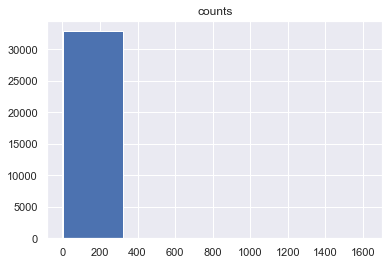

In [21]:
colloc.hist('counts', bins=5)

In [22]:
top_terms = top_terms.loc[:, ~top_terms.columns.str.contains('^level')]
test = top_terms.groupby(['title', 'year']).size().reset_index(name='size')
test['size'].unique()

array([ 40,  20,  10,  30,  17,  50,  70,  60, 100])

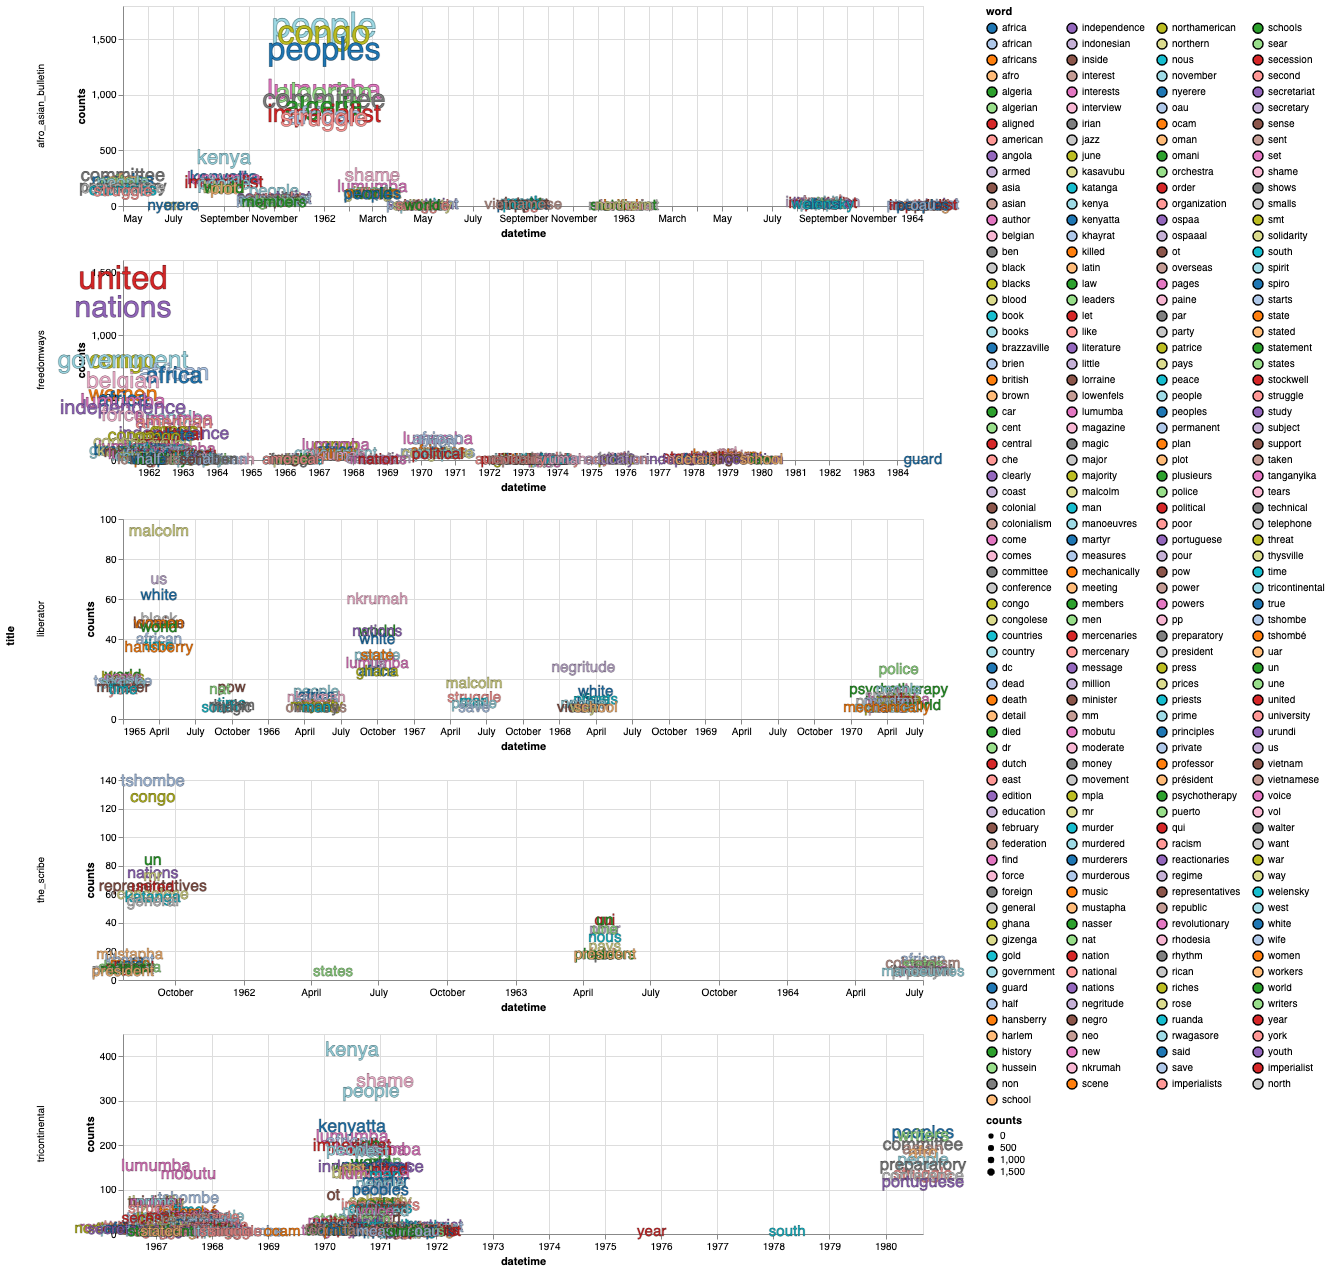

In [23]:
# selection = alt.selection_multi(fields=['word'], bind='legend')
selection = alt.selection_single(empty='all', fields=['word'])
highlight = alt.selection(type='single', on='mouseover',
                          fields=['word'], nearest=True)
terms = top_terms[(top_terms.counts> 5)].word.unique().tolist()
terms_len = len(terms)
terms.sort()
base = alt.Chart(top_terms[(top_terms.counts> 5)]).properties(height=200, width=800).configure_legend(labelLimit= 0).resolve_scale(x='independent', y='independent')
 
alt.Chart(top_terms[(top_terms.counts> 5)]).mark_text(stroke='black', strokeWidth=0.3).encode(
    x='datetime:T',
    y='counts:Q',
    text='word',
    size=alt.Size('counts:Q', scale=alt.Scale(range=[15, 35])),
    color=alt.Color('word:O', 
                    scale=alt.Scale(scheme='category20'),
                    legend=alt.Legend(columns=4, symbolLimit=terms_len), 
#                     sort=terms.sort()
                   ),
    strokeWidth=alt.condition(selection, alt.value(0.5), alt.value(1)),
    tooltip=['word', 'counts', 'datetime'],
    row='title:O',
    opacity=alt.condition(selection, alt.value(1), alt.value(0.2))
).add_selection(
    selection
).properties(height=200, width=800).configure_legend(labelLimit= 0).resolve_scale(x='independent', y='independent')
